
# Fourier Transform Experimentation

#### 20180421 by Brandon D. Shroyer

In [170]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt
from scipy.stats import norm


## Setup

In [192]:
xSin = np.linspace(0.0, 120.0, 120)
xLine = np.linspace(0.0, 120.0, 120)
xLog = np.linspace(0.0, 120.0, 120)
xExp = np.linspace(0.0, 120.0, 120)
xNoise = np.linspace(0.0, 120.0, 120)
xMixed = np.linspace(0.0, 120.0, 120)
xStep = np.linspace(0.0, 120.0, 120)
xSquareWave = np.linspace(0.0, 120.0, 120)
xImpulse = np.linspace(0.0, 120.0, 120)
xMonoImpulse = np.linspace(0.0, 120.0, 120)
xGaussian = np.linspace(0.0, 120.0, 120)

In [227]:
ySin = [np.sin(x) for x in xSin]
yLine = [x + 1 for x in xLine]
yLog = [np.log(x + 1.0e-8) for x in xLog]
yExp = [np.exp(-x) for x in xExp]
yNoise = np.random.normal(0.0, 1.0, 120)

yStep = np.zeros(int(len(xStep)))
yStep[int(len(xStep))//2:] = 1.0

ySquareWave = np.zeros(int(len(xStep)))
ySquareWave[int(len(xStep))//2:2*int(len(xStep))//3] = 1.0

yImpulse = np.zeros(int(len(xImpulse)))
yImpulse[::10] = 1.0

yMonoImpulse = np.zeros(int(len(xMonoImpulse)))
yMonoImpulse[40] = 1.0

yGaussian = norm.pdf(xGaussian, int(len(xGaussian))/2, 10)

yMixed = ySin + yNoise #[x + 1 + np.sin(1*x) for x in x0]

In [228]:
YSin = fftpack.fft(ySin)
XSin = fftpack.fftfreq(len(YSin))
YLine = fftpack.fft(yLine)
XLine = fftpack.fftfreq(len(YLine))
YLog = fftpack.fft(yLog)
XLog = fftpack.fftfreq(len(YLog))
YExp = fftpack.fft(yExp)
XExp = fftpack.fftfreq(len(YExp))
YNoise = fftpack.fft(yNoise)
XNoise = fftpack.fftfreq(len(YNoise))
YStep = fftpack.fft(yStep)
XStep = fftpack.fftfreq(len(YStep))
YSquareWave = fftpack.fft(ySquareWave)
XSquareWave = fftpack.fftfreq(len(YSquareWave))
YImpulse = fftpack.fft(yImpulse)
XImpulse = fftpack.fftfreq(len(YImpulse))
YMonoImpulse = fftpack.fft(yMonoImpulse)
XMonoImpulse = fftpack.fftfreq(len(YMonoImpulse))
YGaussian = fftpack.fft(yGaussian)
XGaussian = fftpack.fftfreq(len(YGaussian))
YMixed = fftpack.rfft(yMixed)
XMixed = fftpack.rfftfreq(len(YMixed))


## Overview Plots

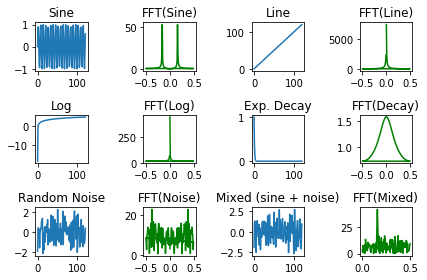

In [229]:
fig, ax = plt.subplots(nrows=3, ncols=4)
ax[0][0].plot(xSin, ySin)
ax[0][1].plot(XSin, np.abs(YSin), color='green')
ax[0][0].set_title('Sine')
ax[0][1].set_title('FFT(Sine)')

ax[0][2].plot(xLine, yLine)
ax[0][3].plot(XLine, np.abs(YLine), color='green')
ax[0][2].set_title('Line')
ax[0][3].set_title('FFT(Line)')

ax[1][0].plot(xLog, yLog)
ax[1][1].plot(XLog, np.abs(YLog), color='green')
ax[1][0].set_title('Log')
ax[1][1].set_title('FFT(Log)')

ax[1][2].plot(xExp, yExp)
ax[1][3].plot(XExp, np.abs(YExp), color='green')
ax[1][2].set_title('Exp. Decay')
ax[1][3].set_title('FFT(Decay)')

ax[2][0].plot(xNoise, yNoise)
ax[2][1].plot(XNoise, np.abs(YNoise), color='green')
ax[2][0].set_title('Random Noise')
ax[2][1].set_title('FFT(Noise)')

ax[2][2].plot(xMixed, yMixed)
ax[2][3].plot(XMixed, np.abs(YMixed), color='green')
ax[2][2].set_title('Mixed (sine + noise)')
ax[2][3].set_title('FFT(Mixed)')

plt.tight_layout()
plt.show()

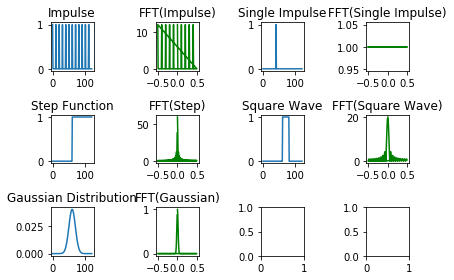

In [230]:
fig, ax = plt.subplots(nrows=3, ncols=4)

ax[0][0].plot(xImpulse, yImpulse)
ax[0][1].plot(XImpulse, np.abs(YImpulse), color='green')
ax[0][0].set_title('Impulse')
ax[0][1].set_title('FFT(Impulse)')

ax[0][2].plot(xMonoImpulse, yMonoImpulse)
ax[0][3].plot(XMonoImpulse, np.abs(YMonoImpulse), color='green')
ax[0][2].set_title('Single Impulse')
ax[0][3].set_title('FFT(Single Impulse)')

ax[1][0].plot(xStep, yStep)
ax[1][1].plot(XStep, np.abs(YStep), color='green')
ax[1][0].set_title('Step Function')
ax[1][1].set_title('FFT(Step)')

ax[1][2].plot(xSquareWave, ySquareWave)
ax[1][3].plot(XSquareWave, np.abs(YSquareWave), color='green')
ax[1][2].set_title('Square Wave')
ax[1][3].set_title('FFT(Square Wave)')

ax[2][0].plot(xGaussian, yGaussian)
ax[2][1].plot(XGaussian, np.abs(YGaussian), color='green')
ax[2][0].set_title('Gaussian Distribution')
ax[2][1].set_title('FFT(Gaussian)')

plt.tight_layout()
plt.show()


## Sines

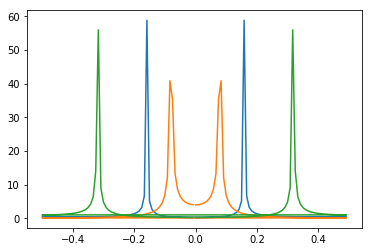

In [54]:
ySin0_5 = [np.sin(0.5*x) for x in xSin]
YSin0_5 = fftpack.fft(ySin0_5)
XSin0_5 = fftpack.fftfreq(len(YSin0_5))
ySin1 = [np.sin(x) for x in xSin]
YSin1 = fftpack.fft(ySin1)
XSin1 = fftpack.fftfreq(len(YSin1))
ySin2 = [np.sin(2*x) for x in xSin]
YSin2 = fftpack.fft(ySin2)
XSin2 = fftpack.fftfreq(len(YSin2))

plt.plot(XSin1, np.abs(YSin1), XSin0_5, np.abs(YSin0_5), XSin2, np.abs(YSin2))

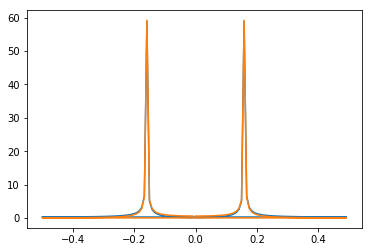

In [57]:
ySin1 = [np.sin(x) for x in xSin]
YSin1 = fftpack.fft(ySin1)
XSin1 = fftpack.fftfreq(len(YSin1))
yCos1 = [np.cos(x) for x in xSin]
YCos1 = fftpack.fft(yCos1)
XCos1 = fftpack.fftfreq(len(YCos1))

plt.plot(XSin1, np.abs(YSin1), XCos1, np.abs(YCos1))


## Exponential Decay

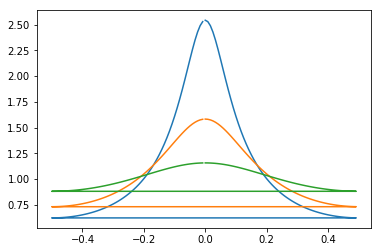

In [59]:
yExp1 = [np.exp(-x) for x in xExp]
YExp1 = fftpack.fft(yExp1)
XExp1 = fftpack.fftfreq(len(YExp1))
yExp0_5 = [np.exp(-0.5*x) for x in xExp]
YExp0_5 = fftpack.fft(yExp0_5)
XExp0_5 = fftpack.fftfreq(len(YExp0_5))
yExp2 = [np.exp(-2*x) for x in xExp]
YExp2 = fftpack.fft(yExp2)
XExp2 = fftpack.fftfreq(len(YExp2))
plt.plot(XExp0_5, np.abs(YExp0_5), XExp1, np.abs(YExp1), XExp2, np.abs(YExp2))


## Logarithms

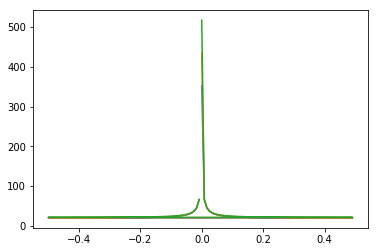

In [63]:
yLog1 = [np.log(x + 1.0e-8) for x in xLog]
YLog1 = fftpack.fft(yLog1)
XLog1 = fftpack.fftfreq(len(YLog1))
yLog0_5 = [np.log(0.5*x + 1.0e-8) for x in xLog]
YLog0_5 = fftpack.fft(yLog0_5)
XLog0_5 = fftpack.fftfreq(len(YLog0_5))
yLog2 = [np.log(2*x + 1.0e-8) for x in xLog]
YLog2 = fftpack.fft(yLog2)
XLog2 = fftpack.fftfreq(len(YLog2))

plt.plot(XLog0_5, np.abs(YLog0_5), XLog1, np.abs(YLog1), XLog2, np.abs(YLog2))

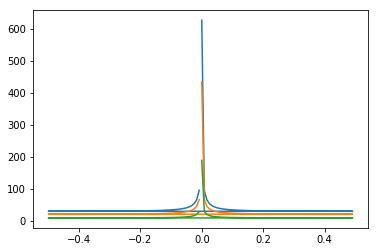

In [64]:
yLN = [np.log(x + 1.0e-8) for x in xLog]
YLN = fftpack.fft(yLN)
XLN = fftpack.fftfreq(len(YLN))
yLog2 = [np.log2(x + 1.0e-8) for x in xLog]
YLog2 = fftpack.fft(yLog2)
XLog2 = fftpack.fftfreq(len(YLog2))
yLog10 = [np.log10(x + 1.0e-8) for x in xLog]
YLog10 = fftpack.fft(yLog10)
XLog10 = fftpack.fftfreq(len(YLog10))

plt.plot(XLog2, np.abs(YLog2), XLN, np.abs(YLN), XLog10, np.abs(YLog10))


## Lines

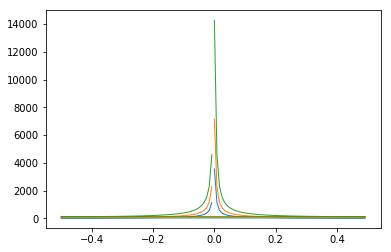

In [73]:
yLine1 = [x for x in xLine]
YLine1 = fftpack.fft(yLine1)
XLine1 = fftpack.fftfreq(len(YLine1))
yLine0_5 = [0.5*x for x in xLine]
YLine0_5 = fftpack.fft(yLine0_5)
XLine0_5 = fftpack.fftfreq(len(YLine0_5))
yLine2 = [2*x for x in xLine]
YLine2 = fftpack.fft(yLine2)
XLine2 = fftpack.fftfreq(len(YLine2))
plt.plot(XLine0_5, np.abs(YLine0_5), XLine1, np.abs(YLine1), XLine2, np.abs(YLine2), linewidth=1)

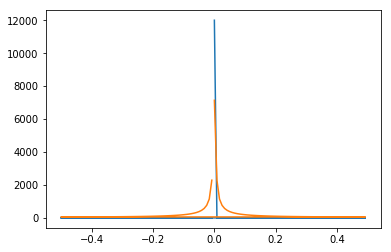

In [71]:
yLine1 = [x for x in xLine]
YLine1 = fftpack.fft(yLine1)
XLine1 = fftpack.fftfreq(len(YLine1))
yLineConst = [100 for x in xLine]
YLineConst = fftpack.rfft(yLineConst)
XLineConst = fftpack.fftfreq(len(YLineConst))
plt.plot(XLineConst, np.abs(YLineConst), XLine1, np.abs(YLine1))

In [ ]:

# Point functions and Step Functions

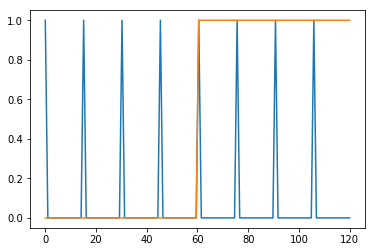

In [135]:
xStep = np.linspace(0.0,120.0,120)
yStep = np.zeros(120)
yStep[60:] = 1.0

xPoint = np.linspace(0.0,120.0,120)
yPoint = np.zeros(120)
yPoint[::15] = 1.0

plt.plot(xPoint, yPoint, xStep, yStep)


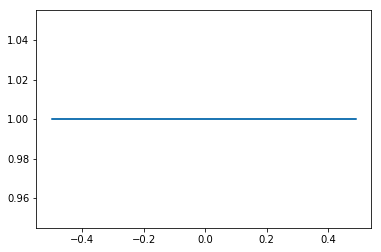

In [207]:
xPoint = np.linspace(0.0,120.0,120)
yPoint = np.zeros(120)
#yPoint[::15] = 1.0
yPoint[10] = 1.0
#yPoint[60:] = 0

YPoint = fftpack.fft(yPoint)
XPoint = fftpack.fftfreq(len(YPoint))

plt.plot(XPoint, np.abs(YPoint))

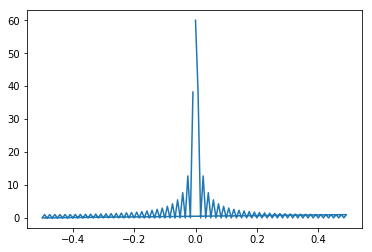

In [137]:
xStep = np.linspace(0.0,120.0,120)
yStep = np.zeros(120)
yStep[60:] = 1.0

YStep = fftpack.fft(yStep)
XStep = fftpack.fftfreq(len(YStep))

plt.plot(XStep, np.abs(YStep))

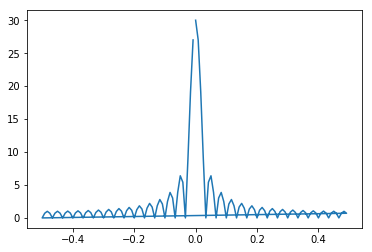

In [139]:
xSquareWave = np.linspace(0.0,120.0,120)
ySquareWave = np.zeros(120)
ySquareWave[30:] = 1.0
ySquareWave[60:] = 0.0

YSquareWave = fftpack.fft(ySquareWave)
XSquareWave = fftpack.fftfreq(len(YSquareWave))

plt.plot(XSquareWave, np.abs(YSquareWave))

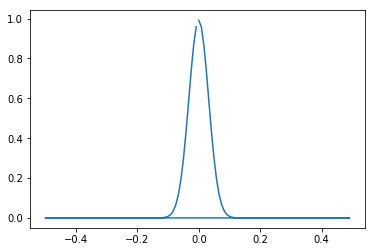

In [158]:
xGaussian = np.linspace(0.0,120.0,120)
yGaussian = norm.pdf(xGaussian,60,5)

YGaussian = fftpack.fft(yGaussian)
XGaussian = fftpack.fftfreq(len(YGaussian))

plt.plot(XGaussian, np.abs(YGaussian))